In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import matplotlib.dates as mdates

%matplotlib inline

In [145]:
flight = 650

In [146]:
basedir = 'data/P3_2017/LGS'
infile = 'line_' + str(flight) + 'b.csv'
# infile = 'OIB_P3_F2001_exportfromGeosoft.csv'
# infile = 'OIB_P3_F2004_exportfromGeosoft.csv'
df = pd.read_csv(os.path.join(basedir, infile))
df.head()

,Line,AccBiasZ,AccBiasZ_neg,CROSS_DIFF_FA_100,DgS_filter_Corrected_Free_Air,dgs_imar_2,dgs_imar_3,dgs_imar_diff,dgs_imar_linear,dgs_imar_res,...,imar_shift,LATITUDE,Lon,LONG_comp,LONGITUDE,temp,temp_neg,unixtime,X,Y
0,L650,0.002190,-0.002190,NaN,-27.069690,202.108575,205.592594,191.944457,206.496575,-13.648137,...,-27.014147,-79.913642,NaN,173.893016,173.893016,26.450040,-26.450040,1.479860e+09,116881.995451,-1.092432e+06
1,L650,0.002190,-0.002190,NaN,-27.098409,202.100744,205.577940,191.920372,206.484448,-13.657568,...,-27.018781,-79.913734,NaN,173.897723,173.897723,26.453072,-26.453072,1.479860e+09,116791.163593,-1.092432e+06
2,L650,0.002190,-0.002190,NaN,-27.126511,202.092913,205.563290,191.904819,206.472321,-13.658471,...,-27.031330,-79.913826,NaN,173.902430,173.902430,26.455118,-26.455118,1.479860e+09,116700.349788,-1.092431e+06
3,L650,0.002191,-0.002191,NaN,-27.155135,202.085079,205.548645,191.898291,206.460193,-13.650353,...,-27.053426,-79.913918,NaN,173.907136,173.907136,26.457163,-26.457163,1.479860e+09,116609.550865,-1.092431e+06
4,L650,0.002191,-0.002191,NaN,-27.182982,202.077245,205.534003,191.901713,206.448066,-13.632290,...,-27.084695,-79.914010,NaN,173.911842,173.911842,26.459313,-26.459313,1.479860e+09,116518.759404,-1.092430e+06


In [147]:
df.keys()

Index(['Line', 'AccBiasZ', 'AccBiasZ_neg', 'CROSS_DIFF_FA_100',
       'DgS_filter_Corrected_Free_Air', 'dgs_imar_2', 'dgs_imar_3',
       'dgs_imar_diff', 'dgs_imar_linear', 'dgs_imar_res', 'diff', 'diff_100',
       'diff_zls', 'Dist', 'FA_100', 'FA_100_level', 'FA_def_edit', 'FA_RAW',
       'FA_RAW_edit', 'FA_SP', 'fag_oib', 'Height', 'Height1', 'Height_100',
       'imar_detrend1', 'imar_detrend2', 'imar_detrend2_100', 'imar_detrend3',
       'imar_mgal', 'imar_mgal_neg', 'imar_shift', 'LATITUDE', 'Lon',
       'LONG_comp', 'LONGITUDE', 'temp', 'temp_neg', 'unixtime', 'X', 'Y'],
      dtype='object')

In [148]:
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df = df.set_index(pd.to_datetime(df['unixtime'],unit='s'))

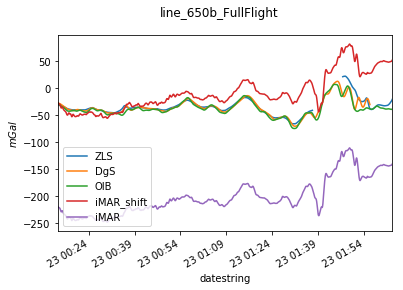

In [209]:
fig, ax = plt.subplots()
ln1 = df['FA_def_edit'].plot(label='ZLS')
ln2 = df['DgS_filter_Corrected_Free_Air'].plot(label='DgS')
ln3 = df['fag_oib'].plot(label='OIB')
ln4 = df['imar_shift'].plot(label='iMAR_shift')
ln5 = df['imar_mgal_neg'].plot(label='iMAR')
ax.set_ylabel('$mGal$')
plt.legend()
plt.suptitle(infile[:9] + '_FullFlight')
plt.savefig('figs/' + infile[:9] + '_Grav_AllComp_FullFlight.png')

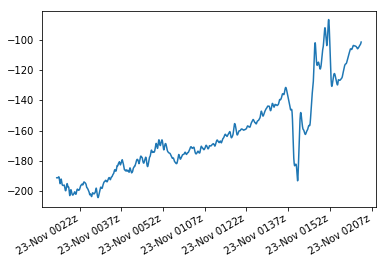

In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df['imar_mgal_neg'] - df['fag_oib'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H%Mz'))
fig.autofmt_xdate()

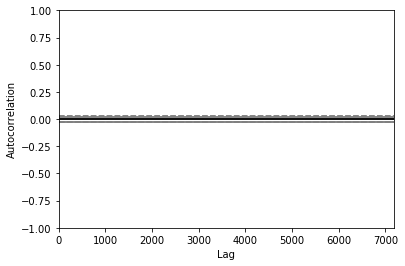

In [151]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['imar_mgal_neg'])
# autocorrelation_plot(df['grav_4_70_corr'])
autocorrelation_plot(df['fag_oib'])
# plt.legend()
plt.show()

Text(0,0.5,'$^{\\circ}C$')

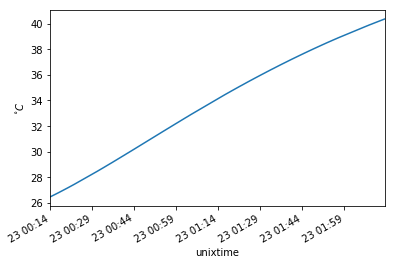

In [152]:
fig, ax = plt.subplots()
df['temp'].plot()
# df['temp_neg'].plot()
ax.set_ylabel('$^{\circ}C$')

In [153]:
# F001
begin_line = df.index[0]
end_line = df.index[-1]


In [154]:
# fig, ax = plt.subplots()
# # gravity = gravity[(begin_line <= gravity.index) & (gravity.index <= end_line)]
# df[['grav_4_70_corr', 'oib_10_11_12']].loc[begin_line: end_line].plot(ax=ax)
# ax.set_ylabel('$mGal$')
# plt.suptitle(infile[:12] + '_LineSegment')
# plt.savefig('figs/' + infile[:12] + '_Grav_iMAR-vs-OIB_LineSegment.png')

In [155]:
df['imar_bias'] = df['imar_shift'] - df['fag_oib']

Text(0,0.5,'$mGal$')

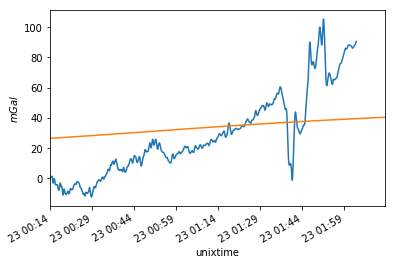

In [156]:
fig, ax = plt.subplots()
# df['imar_bias'].loc[begin_line: end_line].plot()
df['imar_bias'].plot()
df['temp'].plot()
ax.set_ylabel('$mGal$')



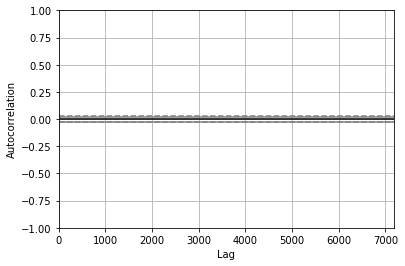

In [157]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['imar_bias'])
plt.show()

## LOWESS
Need to adjust "frac" in the lowess module to get a compatible, linear relationship.

In [158]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = df['unixtime']
# x = df['Dist']
y = df['imar_bias']

# lowess will return our "smoothed" data with a y value for at every x-value
my_frac = 0.5
lowess = sm.nonparametric.lowess(y, x, frac=my_frac)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400000)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)
# df['imar_bias_lowess'] = lowess_y

In [159]:
# df_temp['imar_bias_lowess'] = np.squeeze(lowess_y)
data=np.array([lowess_x, lowess_y]).T
lowess_index = pd.to_datetime(lowess_x,unit='s')
df_lowess = pd.DataFrame(data=data, index=lowess_index, columns=['unixtime','imar_bias_lowess'])
df_lowess.head()
# df_lowess['datestring'] = pd.to_datetime(df_lowess['unixtime'],unit='s')
# df_lowess = df_lowess.set_index(pd.to_datetime(df_lowess['unixtime'],unit='s'))
# df_lowess.head()

,unixtime,imar_bias_lowess
2016-11-23 00:13:48.500,1.479860e+09,-11.779337
2016-11-23 00:13:49.500,1.479860e+09,-11.767568
2016-11-23 00:13:50.500,1.479860e+09,-11.755797
2016-11-23 00:13:51.500,1.479860e+09,-11.744026
2016-11-23 00:13:52.500,1.479860e+09,-11.732254


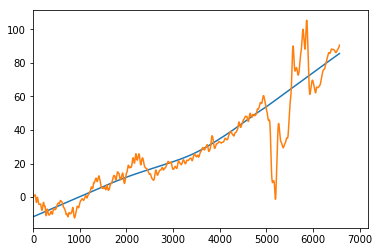

In [161]:
# pd.merge_asof(df, df_lowess, on='unixtime')
pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')['imar_bias_lowess'].plot()
pd.merge_ordered(df, df_lowess, fill_method='ffill')['imar_bias'].plot()

In [162]:
df = pd.merge_ordered(df, df_lowess, fill_method='ffill', how='inner')
df['datestring'] = pd.to_datetime(df['unixtime'],unit='s')
df.set_index(pd.to_datetime(df['datestring'],unit='s'), inplace=True)
df.head()

,Line,AccBiasZ,AccBiasZ_neg,CROSS_DIFF_FA_100,DgS_filter_Corrected_Free_Air,dgs_imar_2,dgs_imar_3,dgs_imar_diff,dgs_imar_linear,dgs_imar_res,...,LONG_comp,LONGITUDE,temp,temp_neg,unixtime,X,Y,datestring,imar_bias,imar_bias_lowess
datestring,,,,,,,,,,,,,,,,,,,,,
2016-11-23 00:13:48.500,L650,0.002190,-0.002190,NaN,-27.069690,202.108575,205.592594,191.944457,206.496575,-13.648137,...,173.893016,173.893016,26.450040,-26.450040,1.479860e+09,116881.995451,-1.092432e+06,2016-11-23 00:13:48.500,0.711180,-11.779337
2016-11-23 00:13:49.500,L650,0.002190,-0.002190,NaN,-27.098409,202.100744,205.577940,191.920372,206.484448,-13.657568,...,173.897723,173.897723,26.453072,-26.453072,1.479860e+09,116791.163593,-1.092432e+06,2016-11-23 00:13:49.500,0.744694,-11.767568
2016-11-23 00:13:50.500,L650,0.002190,-0.002190,NaN,-27.126511,202.092913,205.563290,191.904819,206.472321,-13.658471,...,173.902430,173.902430,26.455118,-26.455118,1.479860e+09,116700.349788,-1.092431e+06,2016-11-23 00:13:50.500,0.769045,-11.755797
2016-11-23 00:13:51.500,L650,0.002191,-0.002191,NaN,-27.155135,202.085079,205.548645,191.898291,206.460193,-13.650353,...,173.907136,173.907136,26.457163,-26.457163,1.479860e+09,116609.550865,-1.092431e+06,2016-11-23 00:13:51.500,0.781803,-11.744026
2016-11-23 00:13:52.500,L650,0.002191,-0.002191,NaN,-27.182982,202.077245,205.534003,191.901713,206.448066,-13.632290,...,173.911842,173.911842,26.459313,-26.459313,1.479860e+09,116518.759404,-1.092430e+06,2016-11-23 00:13:52.500,0.794291,-11.732254


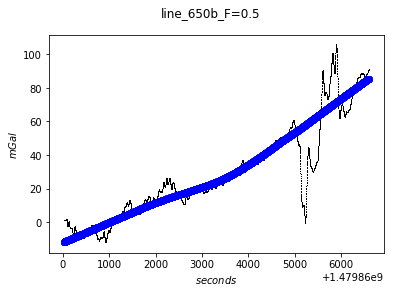

In [163]:
fig, ax = plt.subplots()
plt.plot(x, y, 'k,')
plt.plot(lowess_x, lowess_y, 'bo')
plt.plot(xnew, ynew, 'r-')
ax.set_xlabel('$seconds$')
ax.set_ylabel('$mGal$')
# ax.text(1,1, infile[:9] + '_' + str(my_frac))
plt.suptitle(infile[:9] + '_F=' + str(my_frac))
plt.savefig('figs/' + infile[:9] + '_iMARbias-lowess_F=' + str(my_frac) + '.png')

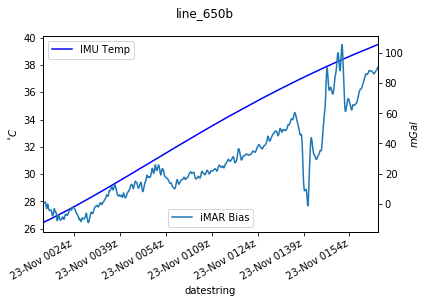

In [164]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
# # For a third trace
# ax2, ax3 = ax.twinx(), ax.twinx()
# rspine = ax3.spines['right']
# rspine.set_position(('axes', 1.25))
# ax3.set_frame_on(True)
# ax3.patch.set_visible(False)
# fig.subplots_adjust(right=0.75)

ax = df['temp'].plot(ax=ax, style='b-', label='IMU Temp')
ax.set_ylabel('$^{\circ}C$')
ax.legend(loc="upper left")
ax2 = df['imar_bias'].plot(ax=ax2, secondary_y=True, label='iMAR Bias')
ax2.set_ylabel('$mGal$')
ax2.set_xlabel('Time (UTC)')
ax2.legend(loc="lower center")
# df['imar_bias'].plot(ax=ax3, style='g-', alpha=0.2)
# plt.legend([ax, ax2],["Temperature", "iMAR bias"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H%Mz'))
fig.autofmt_xdate()
plt.suptitle(infile[:9])
plt.savefig('figs/' + infile[:9] + '_iMARbias-vs-IMUtemp.png')

Text(0,0.5,'$mGal$')

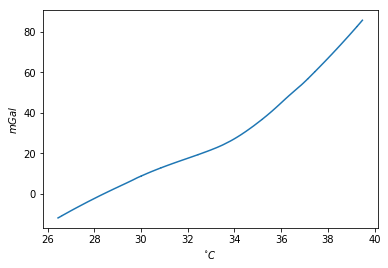

In [165]:
# plt.plot(df['imu_temp_C'].shift(periods=1, freq=lag_argmax), df['imar_bias'])
fig, ax = plt.subplots()
plt.plot(df['temp'], df['imar_bias_lowess'])
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

Text(0,0.5,'$mGal$')

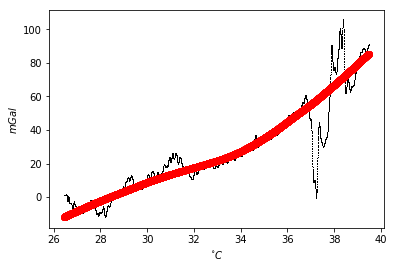

In [166]:
fig, ax = plt.subplots()
plt.plot(df['temp'], df['imar_bias'], 'k,')
plt.plot(df['temp'], df['imar_bias_lowess'],'ro')
ax.set_xlabel('$^{\circ}C$')
ax.set_ylabel('$mGal$')

Pandas correlation

In [241]:
# df[['imu_temp_C', 'imar_bias']].corr()
print(df.corr()['imar_bias_lowess'])

AccBiasZ                        -0.864390
AccBiasZ_neg                     0.864390
CROSS_DIFF_FA_100                     NaN
DgS_filter_Corrected_Free_Air    0.277278
dgs_imar_2                      -0.997476
dgs_imar_3                      -0.998550
dgs_imar_diff                   -0.884471
dgs_imar_linear                 -0.988593
dgs_imar_res                    -0.001984
diff                            -0.211226
diff_100                        -0.214119
diff_zls                        -0.249889
Dist                             0.989526
FA_100                           0.011730
FA_100_level                          NaN
FA_def_edit                      0.254624
FA_RAW                           0.002078
FA_RAW_edit                      0.002078
FA_SP                            0.008691
fag_oib                          0.188161
Height                           0.440764
Height1                          0.354941
Height_100                       0.441011
imar_detrend1                    0

## Linear Regression

In [243]:
import statsmodels.formula.api as smf

# result = sm.ols(formula="A ~ B + C", data=df).fit()
ols = smf.ols(formula="imar_bias_lowess ~ temp", data=df).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.674e+05
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        15:05:24   Log-Likelihood:                -20308.
No. Observations:                6569   AIC:                         4.062e+04
Df Residuals:                    6567   BIC:                         4.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -199.7476      0.566   -353.202      0.0

### Save model results

In [245]:
ols.save("ols_results_650b.pickle")
# new_results = sm.load('poly2_results_650b.pickle')
# new_results.model.formula

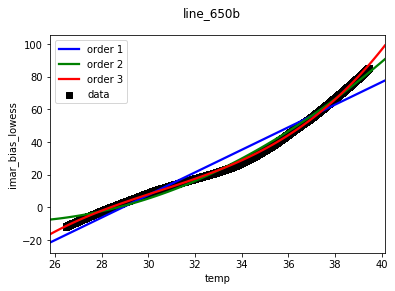

In [244]:
import seaborn as sns
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(df['temp'], df['imar_bias_lowess'], label='data', color='black', marker=',')
sns.regplot(x='temp', y='imar_bias_lowess', data=df, 
            order=1, 
            color='blue', scatter=None, label='order 1')

sns.regplot(x='temp', y='imar_bias_lowess', data=df, 
            order=2, 
            color='green', scatter=None, label='order 2')

sns.regplot(x='temp', y='imar_bias_lowess', data=df, 
            order=3, 
            color='red', scatter=None, label='order 3')
plt.legend()
plt.suptitle(infile[:9])
plt.savefig('figs/' + infile[:9] + '_test_regression_order3.png')

In [170]:
import statsmodels.formula.api as smf

# 2nd order polynomial
poly_2 = smf.ols('imar_bias ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
print(poly_2.summary())

                            OLS Regression Results                            
Dep. Variable:              imar_bias   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.828e+04
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        11:42:12   Log-Likelihood:                -25033.
No. Observations:                6569   AIC:                         5.007e+04
Df Residuals:                    6566   BIC:                         5.009e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        253.0548     11.269     22.

In [210]:

poly_2 = smf.ols('imar_bias_lowess ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
print(poly_2.summary())

                            OLS Regression Results                            
Dep. Variable:       imar_bias_lowess   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 5.005e+05
Date:                Thu, 24 May 2018   Prob (F-statistic):               0.00
Time:                        13:08:27   Log-Likelihood:                -14540.
No. Observations:                6569   AIC:                         2.909e+04
Df Residuals:                    6566   BIC:                         2.911e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        202.6808      2.281     88.

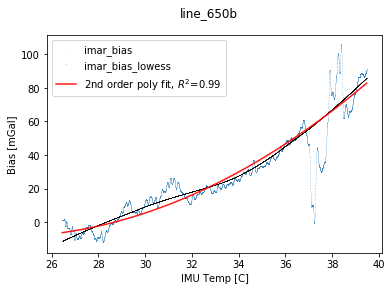

In [211]:
fig, ax = plt.subplots()
plt.plot(df.temp, df.imar_bias, ',', alpha=0.2)
plt.plot(df.temp, df.imar_bias_lowess, 'k,', alpha=0.2)
plt.plot(df.temp, poly_2.predict(df), 'r-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
# plt.xlim((40, 47))
# plt.ylim((-10, 20))
plt.xlabel('IMU Temp [C]')
plt.ylabel('Bias [mGal]')
plt.legend(loc="upper left")
plt.suptitle(infile[:9])
plt.savefig('figs/' + infile[:9] + '_2ndOrderOLS_reults.png')

### Save model results

In [245]:
poly_2.save("poly2_results_650b.pickle")
# new_results = sm.load('poly2_results_650b.pickle')
# new_results.model.formula

## Test applying the correction

In [212]:
df.keys()

Index(['Line', 'AccBiasZ', 'AccBiasZ_neg', 'CROSS_DIFF_FA_100',
       'DgS_filter_Corrected_Free_Air', 'dgs_imar_2', 'dgs_imar_3',
       'dgs_imar_diff', 'dgs_imar_linear', 'dgs_imar_res', 'diff', 'diff_100',
       'diff_zls', 'Dist', 'FA_100', 'FA_100_level', 'FA_def_edit', 'FA_RAW',
       'FA_RAW_edit', 'FA_SP', 'fag_oib', 'Height', 'Height1', 'Height_100',
       'imar_detrend1', 'imar_detrend2', 'imar_detrend2_100', 'imar_detrend3',
       'imar_mgal', 'imar_mgal_neg', 'imar_shift', 'LATITUDE', 'Lon',
       'LONG_comp', 'LONGITUDE', 'temp', 'temp_neg', 'unixtime', 'X', 'Y',
       'datestring', 'imar_bias', 'imar_bias_lowess'],
      dtype='object')

6569


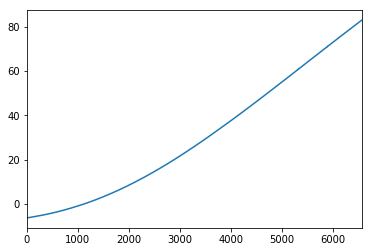

In [215]:
# dir(poly_2)
# poly_2.model.formula
correction = poly_2.predict(pd.DataFrame({'intercept': 202,
                             'temp': df['temp'].values}))
print(len(correction))
correction.plot()

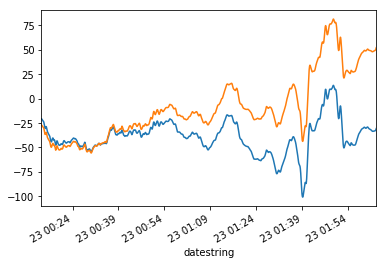

In [234]:
df['imar_adjusted_o2'] = df['imar_shift'] - correction.values
df['imar_adjusted_o2'].plot(label='iMAR_adj')
df['imar_shift'].plot(label='imar_shift')

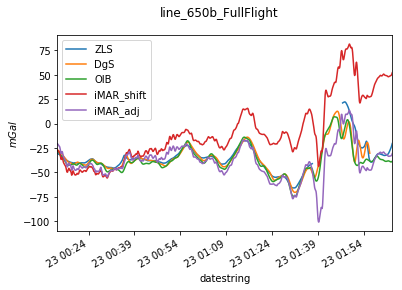

In [236]:
fig, ax = plt.subplots()
ln1 = df['FA_def_edit'].plot(label='ZLS')
ln2 = df['DgS_filter_Corrected_Free_Air'].plot(label='DgS')
ln3 = df['fag_oib'].plot(label='OIB')
ln4 = df['imar_shift'].plot(label='iMAR_shift')
ln5 = df['imar_adjusted_o2'].plot(label='iMAR_adj')
ax.set_ylabel('$mGal$')
plt.legend()
plt.suptitle(infile[:9] + '_FullFlight')
plt.savefig('figs/' + infile[:9] + '_2ndOrderOLS_reults_COMPARE.png')

6569


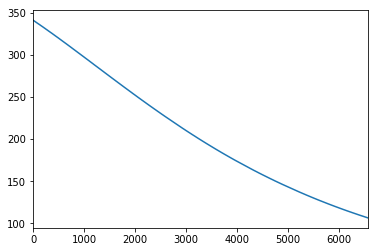

In [214]:
correction = poly_2.predict(pd.DataFrame({'intercept': 202,
                             'temp': (df['temp']-df['temp'].mean()).values}))
print(len(correction))
correction.plot()